In [2]:
using BoundaryValueDiffEq
using Plots

In [5]:
# solves the scalar diffusion equatiobn -d^2/dx^2 u(x) = f(x)
# on the interval 0 < x < 80
# supplied with Dirichlet or Neumann boundary conditions 

In [6]:
# define spatial range 
xspan = (0.0, 80.)

(0.0, 80.0)

In [7]:
# define the source function f(x)
function sourceFct(x)
    X0 = 60
    σ = 0.8
    A = 10.
    return  A .* exp.(.-((x .- X0).^2)./σ^2)
    #return 0 .* x
end

sourceFct (generic function with 1 method)

In [9]:
# define diffusion equation 
function diffusion!(du, u, p, x)
    # u[1]: concentration 
    # u[2]: fluc 
    # d/dx(concentration)  = flux 
    du[1] = u[2]
    # d/dx(flux)  = sourceFct
    du[2] = 0 - sourceFct(x)
end

diffusion! (generic function with 1 method)

In [10]:
# define boundary conditions 
function boundaries!(residual, u, p, x)
    # residual boundary condition in the left end-point 
    residual[1] = u[1][1] - 10
    # residual boundary condition in the left end-point
    residual[2] = u[end][1] - 50
end 

boundaries! (generic function with 1 method)

In [11]:
# Parameter for a copper bar 
d= 8.92 #density 
sh= 0.092 #specific_heat
tc= 0.95 #thermal_conductivity
N =100
l = 80.
dx = l/N
xvec = Vector(0:dx:l)

c = ( tc / (sh * d))^(1/2) 
p = [c^2]; 

In [12]:
# set the boundary value problem to solve
bvp1 = BVProblem(diffusion!, boundaries!, [10., 50.], xspan,p)

# set the boundary value problem  
sol1 = solve(bvp1, GeneralMIRK4(), dt = 1)

retcode: Success
Interpolation: 1st order linear
t: 81-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 69.0
 70.0
 71.0
 72.0
 73.0
 74.0
 75.0
 76.0
 77.0
 78.0
 79.0
 80.0
u: 81-element Array{Array{Float64,1},1}:
 [10.0, 4.040639231765054]
 [14.040639231765054, 4.040639231765054]
 [18.081278463530108, 4.040639231765054]
 [22.121917695295163, 4.040639231765054]
 [26.162556927060216, 4.040639231765054]
 [30.20319615882527, 4.040639231765054]
 [34.24383539059033, 4.040639231765054]
 [38.28447462235538, 4.040639231765054]
 [42.32511385412043, 4.040639231765054]
 [46.36575308588549, 4.040639231765054]
 [50.40639231765054, 4.040639231765054]
 [54.4470315494156, 4.040639231765054]
 [58.487670781180654, 4.040639231765054]
 ⋮
 [161.34109464824678, -10.121917695295163]
 [151.21917695295164, -10.121917695295163]
 [141.09725925765648, -10.121917695295163]
 [130.9753415623613, -10.121917695295163]
 [120.85342386706614, -10.1219176952951

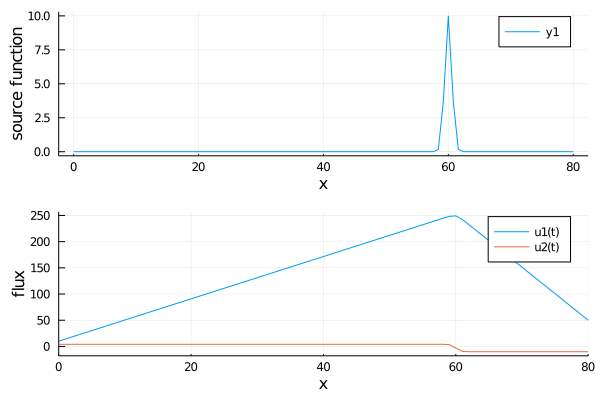

In [15]:
# plot the computed solution
xvec = Vector(0:dx:l)
fvec = sourceFct.(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p3 = plot(sol1, idxs = (2))
xlabel!("x") 
ylabel!("flux")

plot(p1,p3,layout=(2,1))